In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import preprocessing

Using TensorFlow backend.


In [9]:
########신경망 학습에서 발생하는 과적합 제거 및 감소##############

np.random.seed(0)
tf.random.set_seed(0)

df = pd.read_csv('./dataset/sonar.csv',  header=None)
print(df.head())
print(df.info())

dataset = df.values
X = dataset[:,0:60].astype(float)
y = dataset[:,60]
 

le =preprocessing.LabelEncoder()
le.fit(y)
Y = le.transform(y)

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [10]:
#첫번재 은닉층 (출력뉴런수 24, 활성화함수 relu)
#두번재 은닉층 (출력뉴런수 10, 활성화함수 relu)
#출력층 (출력뉴런수 1, 활성화함수 sigmoid)
#epochs =200
#batch_size=5
#오차함수 : 평균 제곱 오차계산함수
#최적화함수 : adam
#측정지표 : accuracy

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
 
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=5)
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/100
145/145 [==============================] - 0s 1ms/step - loss: 0.2522 - accuracy: 0.5310
Epoch 2/100
145/145 [==============================] - 0s 316us/step - loss: 0.2463 - accuracy: 0.5172
Epoch 3/100
145/145 [==============================] - 0s 337us/step - loss: 0.2440 - accuracy: 0.5379
Epoch 4/100
145/145 [==============================] - 0s 330us/step - loss: 0.2420 - accuracy: 0.5310
Epoch 5/100
145/145 [==============================] - 0s 323us/step - loss: 0.2398 - accuracy: 0.5448
Epoch 6/100
145/145 [==============================] - 0s 303us/step - loss: 0.2382 - accuracy: 0.5517
Epoch 7/100
145/145 [==============================] - 0s 337us/step - loss: 0.2340 - accuracy: 0.5448
Epoch 8/100
145/145 [==============================] - 0s 316us/step - loss: 0.2302 - accuracy: 0.5586
Epoch 9/100
145/145 [==============================] - 0s 365us/step - loss: 0.2209 - accuracy: 0.6483
Epoch 10/100
145/145 [==============================] - 0s 351us/step - los

In [11]:
#학습 결과 모델을 저장후 새로운 데이터에 대해서 예측할때 저장된 모델을 불러와 사용합니다.
from keras.models import load_model

model.save('sonar_model.h5')

 
from tensorflow.keras.models import load_model
model2 = load_model('sonar_model.h5')
 
print("\n Accuracy: %.4f" % (model2.evaluate(X_test, Y_test)[1]))

63/63 [==============================] - 0s 950us/sample - loss: 0.1429 - accuracy: 0.8413

 Accuracy: 0.8413


In [12]:
#####데이터셋 크기가 작은 경우 K겹 교차 검증으로 학습##################
#전체 데이터셋을 K개의 부분 데이터셋으로 나눠서 학습시에 한번씩 테스트 셋으로 
#전체 데이터를 테스트 셋으로 활용
from sklearn.model_selection import StratifiedKFold

n_fold=5
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)

for train , test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24,  input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)


Epoch 1/100
166/166 [==============================] - 0s 799us/step - loss: 0.2492 - accuracy: 0.5422
Epoch 2/100
166/166 [==============================] - 0s 318us/step - loss: 0.2363 - accuracy: 0.6024
Epoch 3/100
166/166 [==============================] - 0s 318us/step - loss: 0.2289 - accuracy: 0.6205
Epoch 4/100
166/166 [==============================] - 0s 318us/step - loss: 0.2185 - accuracy: 0.6325
Epoch 5/100
166/166 [==============================] - 0s 348us/step - loss: 0.2099 - accuracy: 0.6747
Epoch 6/100
166/166 [==============================] - 0s 324us/step - loss: 0.1947 - accuracy: 0.7229
Epoch 7/100
166/166 [==============================] - 0s 283us/step - loss: 0.1870 - accuracy: 0.7530
Epoch 8/100
166/166 [==============================] - 0s 325us/step - loss: 0.1804 - accuracy: 0.7229
Epoch 9/100
166/166 [==============================] - 0s 288us/step - loss: 0.1695 - accuracy: 0.7590
Epoch 10/100
166/166 [==============================] - 0s 306us/step - l

Epoch 58/100
166/166 [==============================] - 0s 379us/step - loss: 0.0675 - accuracy: 0.9458
Epoch 59/100
166/166 [==============================] - 0s 373us/step - loss: 0.0669 - accuracy: 0.9096
Epoch 60/100
166/166 [==============================] - 0s 372us/step - loss: 0.0601 - accuracy: 0.9337
Epoch 61/100
166/166 [==============================] - 0s 342us/step - loss: 0.0577 - accuracy: 0.9458
Epoch 62/100
166/166 [==============================] - 0s 379us/step - loss: 0.0541 - accuracy: 0.9518
Epoch 63/100
166/166 [==============================] - 0s 366us/step - loss: 0.0563 - accuracy: 0.9217
Epoch 64/100
166/166 [==============================] - 0s 312us/step - loss: 0.0678 - accuracy: 0.8916
Epoch 65/100
166/166 [==============================] - 0s 318us/step - loss: 0.0632 - accuracy: 0.9217
Epoch 66/100
166/166 [==============================] - 0s 318us/step - loss: 0.0528 - accuracy: 0.9458
Epoch 67/100
166/166 [==============================] - 0s 294us

167/167 [==============================] - 0s 287us/step - loss: 0.1794 - accuracy: 0.8024
Epoch 15/100
167/167 [==============================] - 0s 293us/step - loss: 0.1726 - accuracy: 0.7784
Epoch 16/100
167/167 [==============================] - 0s 293us/step - loss: 0.1667 - accuracy: 0.7904
Epoch 17/100
167/167 [==============================] - 0s 293us/step - loss: 0.1611 - accuracy: 0.8144
Epoch 18/100
167/167 [==============================] - 0s 287us/step - loss: 0.1552 - accuracy: 0.8084
Epoch 19/100
167/167 [==============================] - 0s 281us/step - loss: 0.1460 - accuracy: 0.8204
Epoch 20/100
167/167 [==============================] - 0s 305us/step - loss: 0.1533 - accuracy: 0.7784
Epoch 21/100
167/167 [==============================] - 0s 317us/step - loss: 0.1394 - accuracy: 0.8144
Epoch 22/100
167/167 [==============================] - 0s 293us/step - loss: 0.1325 - accuracy: 0.8204
Epoch 23/100
167/167 [==============================] - 0s 317us/step - loss:

Epoch 71/100
167/167 [==============================] - 0s 317us/step - loss: 0.0675 - accuracy: 0.9281
Epoch 72/100
167/167 [==============================] - 0s 317us/step - loss: 0.0667 - accuracy: 0.9341
Epoch 73/100
167/167 [==============================] - 0s 293us/step - loss: 0.0637 - accuracy: 0.9281
Epoch 74/100
167/167 [==============================] - 0s 323us/step - loss: 0.0645 - accuracy: 0.9281
Epoch 75/100
167/167 [==============================] - 0s 299us/step - loss: 0.0668 - accuracy: 0.9281
Epoch 76/100
167/167 [==============================] - 0s 311us/step - loss: 0.0644 - accuracy: 0.9222
Epoch 77/100
167/167 [==============================] - 0s 305us/step - loss: 0.0657 - accuracy: 0.9222
Epoch 78/100
167/167 [==============================] - 0s 305us/step - loss: 0.0614 - accuracy: 0.9341
Epoch 79/100
167/167 [==============================] - 0s 328us/step - loss: 0.0599 - accuracy: 0.9281
Epoch 80/100
167/167 [==============================] - 0s 281us

In [32]:
##### 와인 데이터 셋으로 신경망 학습 #######
# 은닉층 4개 30,12,8,1
# 오차함수 binary_crossentropy
# 전체 샘플이 200회 반복 입력 실행
# 정확도 출력

numpy.random.seed(0)
tf.random.set_seed(0)

df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]


In [33]:
#모델을 저장할 때 모델과 함께 epochs마다 모델의 정확도 함께 저장
# 케라스 내부에서 테스트 오차는 val_loss, 학습 정확도는 acc, 테스트 정확도는 val_acc, 학습셋 오차는 loss로 거듭됨
# verbose 1이면 진행 사항 출력, 0이면 출력
# save_best_only = True는 저장된 모델보다 성능이 좋아졌을때만 저장

import os 
from keras.callbacks import ModelCheckpoint

model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    

In [38]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12,   activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
 
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.33252, saving model to ./model/01-0.3325.hdf5

Epoch 00002: val_loss improved from 0.33252 to 0.26954, saving model to ./model/02-0.2695.hdf5

Epoch 00003: val_loss improved from 0.26954 to 0.23056, saving model to ./model/03-0.2306.hdf5

Epoch 00004: val_loss improved from 0.23056 to 0.21170, saving model to ./model/04-0.2117.hdf5

Epoch 00005: val_loss improved from 0.21170 to 0.20292, saving model to ./model/05-0.2029.hdf5

Epoch 00006: val_loss improved from 0.20292 to 0.19886, saving model to ./model/06-0.1989.hdf5

Epoch 00007: val_loss improved from 0.19886 to 0.19421, saving model to ./model/07-0.1942.hdf5

Epoch 00008: val_loss improved from 0.19421 to 0.18860, saving model to ./model/08-0.1886.hdf5

Epoch 00009: val_loss improved from 0.18860 to 0.18633, saving model to ./model/09-0.1863.hdf5

Epoch 00010: val_loss improved from 0.18633 to 0.18411, saving model to ./model/10-0.1841.hdf5

Epoch 00011: val_loss improved from 0.18411


Epoch 00107: val_loss did not improve from 0.05165

Epoch 00108: val_loss did not improve from 0.05165

Epoch 00109: val_loss did not improve from 0.05165

Epoch 00110: val_loss did not improve from 0.05165

Epoch 00111: val_loss did not improve from 0.05165

Epoch 00112: val_loss did not improve from 0.05165

Epoch 00113: val_loss did not improve from 0.05165

Epoch 00114: val_loss did not improve from 0.05165

Epoch 00115: val_loss improved from 0.05165 to 0.05123, saving model to ./model/115-0.0512.hdf5

Epoch 00116: val_loss improved from 0.05123 to 0.05112, saving model to ./model/116-0.0511.hdf5

Epoch 00117: val_loss did not improve from 0.05112

Epoch 00118: val_loss did not improve from 0.05112

Epoch 00119: val_loss did not improve from 0.05112

Epoch 00120: val_loss did not improve from 0.05112

Epoch 00121: val_loss improved from 0.05112 to 0.05039, saving model to ./model/121-0.0504.hdf5

Epoch 00122: val_loss did not improve from 0.05039

Epoch 00123: val_loss did not im

In [45]:
# epoch 학습 반복 횟수 결정하기 (학습 시간과 정확도, 테스트 결과)
df = df_pre.sample(frac=0.2)

history = model.fit(X,Y, validation_split = 0.3,
                epochs=3000, batch_size=100)

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_acc))

Train on 4547 samples, validate on 1950 samples
Epoch 1/3000
4547/4547 [==============================] - 0s 36us/sample - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0483 - val_accuracy: 0.9892
Epoch 2/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0894 - val_accuracy: 0.9821
Epoch 3/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0235 - accuracy: 0.9919 - val_loss: 0.0411 - val_accuracy: 0.9918
Epoch 4/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0520 - val_accuracy: 0.9892
Epoch 5/3000
4547/4547 [==============================] - 0s 35us/sample - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0566 - val_accuracy: 0.9892
Epoch 6/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0586 - val_accuracy: 0.9872
Epoch 7/3000
4547/4547 [==============================] - 

4547/4547 [==============================] - 0s 28us/sample - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0444 - val_accuracy: 0.9897
Epoch 110/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0200 - accuracy: 0.9925 - val_loss: 0.0576 - val_accuracy: 0.9882
Epoch 111/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0599 - val_accuracy: 0.9887
Epoch 112/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0177 - accuracy: 0.9930 - val_loss: 0.0442 - val_accuracy: 0.9897
Epoch 113/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0463 - val_accuracy: 0.9897
Epoch 114/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0455 - val_accuracy: 0.9882
Epoch 115/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0169 - accuracy: 0.9936 

4547/4547 [==============================] - 0s 27us/sample - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.0585 - val_accuracy: 0.9887
Epoch 218/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0170 - accuracy: 0.9936 - val_loss: 0.0504 - val_accuracy: 0.9908
Epoch 219/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0692 - val_accuracy: 0.9851
Epoch 220/3000
4547/4547 [==============================] - 0s 40us/sample - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0543 - val_accuracy: 0.9913
Epoch 221/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0651 - val_accuracy: 0.9862
Epoch 222/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0202 - accuracy: 0.9923 - val_loss: 0.0519 - val_accuracy: 0.9913
Epoch 223/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0184 - accuracy: 0.9941 

4547/4547 [==============================] - 0s 34us/sample - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0813 - val_accuracy: 0.9892
Epoch 326/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.0644 - val_accuracy: 0.9887
Epoch 327/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0164 - accuracy: 0.9956 - val_loss: 0.0591 - val_accuracy: 0.9897
Epoch 328/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0191 - accuracy: 0.9925 - val_loss: 0.0572 - val_accuracy: 0.9892
Epoch 329/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0685 - val_accuracy: 0.9805
Epoch 330/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0208 - accuracy: 0.9912 - val_loss: 0.0736 - val_accuracy: 0.9887
Epoch 331/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0151 - accuracy: 0.9952 

4547/4547 [==============================] - 0s 37us/sample - loss: 0.0180 - accuracy: 0.9936 - val_loss: 0.0600 - val_accuracy: 0.9872
Epoch 434/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0154 - accuracy: 0.9963 - val_loss: 0.0716 - val_accuracy: 0.9882
Epoch 435/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0700 - val_accuracy: 0.9892
Epoch 436/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0738 - val_accuracy: 0.9903
Epoch 437/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0886 - val_accuracy: 0.9821
Epoch 438/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.0477 - val_accuracy: 0.9887
Epoch 439/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0240 - accuracy: 0.9927 

4547/4547 [==============================] - 0s 31us/sample - loss: 0.0163 - accuracy: 0.9943 - val_loss: 0.0562 - val_accuracy: 0.9897
Epoch 542/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0139 - accuracy: 0.9963 - val_loss: 0.0544 - val_accuracy: 0.9903
Epoch 543/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0653 - val_accuracy: 0.9908
Epoch 544/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.0597 - val_accuracy: 0.9903
Epoch 545/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0528 - val_accuracy: 0.9897
Epoch 546/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0535 - val_accuracy: 0.9903
Epoch 547/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.0132 - accuracy: 0.9965 

4547/4547 [==============================] - 0s 29us/sample - loss: 0.0111 - accuracy: 0.9974 - val_loss: 0.0486 - val_accuracy: 0.9918
Epoch 650/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0204 - accuracy: 0.9923 - val_loss: 0.0885 - val_accuracy: 0.9790
Epoch 651/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0515 - val_accuracy: 0.9908
Epoch 652/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0499 - val_accuracy: 0.9913
Epoch 653/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.0485 - val_accuracy: 0.9908
Epoch 654/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0555 - val_accuracy: 0.9908
Epoch 655/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0119 - accuracy: 0.9967 

4547/4547 [==============================] - 0s 33us/sample - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0520 - val_accuracy: 0.9903
Epoch 758/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.0619 - val_accuracy: 0.9908
Epoch 759/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0159 - accuracy: 0.9963 - val_loss: 0.0454 - val_accuracy: 0.9913
Epoch 760/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.0545 - val_accuracy: 0.9897
Epoch 761/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.0717 - val_accuracy: 0.9887
Epoch 762/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0661 - val_accuracy: 0.9877
Epoch 763/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0137 - accuracy: 0.9958 

4547/4547 [==============================] - 0s 28us/sample - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0617 - val_accuracy: 0.9897
Epoch 866/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0146 - accuracy: 0.9967 - val_loss: 0.0493 - val_accuracy: 0.9908
Epoch 867/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0652 - val_accuracy: 0.9903
Epoch 868/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0583 - val_accuracy: 0.9882
Epoch 869/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0510 - val_accuracy: 0.9892
Epoch 870/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.0592 - val_accuracy: 0.9862
Epoch 871/3000
4547/4547 [==============================] - 0s 43us/sample - loss: 0.0113 - accuracy: 0.9969 

4547/4547 [==============================] - 0s 30us/sample - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0696 - val_accuracy: 0.9877
Epoch 974/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0578 - val_accuracy: 0.9897
Epoch 975/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0532 - val_accuracy: 0.9908
Epoch 976/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0624 - val_accuracy: 0.9903
Epoch 977/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0098 - accuracy: 0.9976 - val_loss: 0.0532 - val_accuracy: 0.9908
Epoch 978/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0676 - val_accuracy: 0.9882
Epoch 979/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0123 - accuracy: 0.9974 

Epoch 1081/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0405 - val_accuracy: 0.9918
Epoch 1082/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0496 - val_accuracy: 0.9918
Epoch 1083/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.0613 - val_accuracy: 0.9882
Epoch 1084/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0690 - val_accuracy: 0.9877
Epoch 1085/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0120 - accuracy: 0.9956 - val_loss: 0.0472 - val_accuracy: 0.9928
Epoch 1086/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.0579 - val_accuracy: 0.9892
Epoch 1087/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.00

Epoch 1135/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.0504 - val_accuracy: 0.9923
Epoch 1136/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0095 - accuracy: 0.9978 - val_loss: 0.0604 - val_accuracy: 0.9882
Epoch 1137/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0519 - val_accuracy: 0.9903
Epoch 1138/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0083 - accuracy: 0.9982 - val_loss: 0.0534 - val_accuracy: 0.9918
Epoch 1139/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.1610 - val_accuracy: 0.9774
Epoch 1140/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0304 - accuracy: 0.9910 - val_loss: 0.0433 - val_accuracy: 0.9897
Epoch 1141/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.01

Epoch 1189/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0143 - accuracy: 0.9947 - val_loss: 0.0732 - val_accuracy: 0.9877
Epoch 1190/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0656 - val_accuracy: 0.9897
Epoch 1191/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0712 - val_accuracy: 0.9897
Epoch 1192/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0634 - val_accuracy: 0.9908
Epoch 1193/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0565 - val_accuracy: 0.9913
Epoch 1194/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.0511 - val_accuracy: 0.9903
Epoch 1195/3000
4547/4547 [==============================] - 0s 34us/sample - loss: 0.00

Epoch 1243/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0563 - val_accuracy: 0.9923
Epoch 1244/3000
4547/4547 [==============================] - 0s 33us/sample - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0712 - val_accuracy: 0.9862
Epoch 1245/3000
4547/4547 [==============================] - 0s 36us/sample - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0706 - val_accuracy: 0.9877
Epoch 1246/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0676 - val_accuracy: 0.9892
Epoch 1247/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0716 - val_accuracy: 0.9882
Epoch 1248/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0106 - accuracy: 0.9958 - val_loss: 0.0644 - val_accuracy: 0.9903
Epoch 1249/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.01

Epoch 1297/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0685 - val_accuracy: 0.9897
Epoch 1298/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0630 - val_accuracy: 0.9856
Epoch 1299/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0113 - accuracy: 0.9952 - val_loss: 0.0575 - val_accuracy: 0.9897
Epoch 1300/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0596 - val_accuracy: 0.9913
Epoch 1301/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0690 - val_accuracy: 0.9892
Epoch 1302/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0566 - val_accuracy: 0.9908
Epoch 1303/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.01

Epoch 1351/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0494 - val_accuracy: 0.9923
Epoch 1352/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.0483 - val_accuracy: 0.9908
Epoch 1353/3000
4547/4547 [==============================] - 0s 25us/sample - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0454 - val_accuracy: 0.9908
Epoch 1354/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0654 - val_accuracy: 0.9882
Epoch 1355/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0657 - val_accuracy: 0.9851
Epoch 1356/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0103 - accuracy: 0.9956 - val_loss: 0.0661 - val_accuracy: 0.9897
Epoch 1357/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.00

Epoch 1405/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0783 - val_accuracy: 0.9872
Epoch 1406/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0661 - val_accuracy: 0.9918
Epoch 1407/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0598 - val_accuracy: 0.9918
Epoch 1408/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.0779 - val_accuracy: 0.9867
Epoch 1409/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0671 - val_accuracy: 0.9903
Epoch 1410/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0671 - val_accuracy: 0.9892
Epoch 1411/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.00

Epoch 1459/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0691 - val_accuracy: 0.9908
Epoch 1460/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0082 - accuracy: 0.9967 - val_loss: 0.0798 - val_accuracy: 0.9887
Epoch 1461/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.0684 - val_accuracy: 0.9908
Epoch 1462/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0609 - val_accuracy: 0.9908
Epoch 1463/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0635 - val_accuracy: 0.9913
Epoch 1464/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0653 - val_accuracy: 0.9897
Epoch 1465/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.00

Epoch 1513/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0726 - val_accuracy: 0.9908
Epoch 1514/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0756 - val_accuracy: 0.9887
Epoch 1515/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0088 - accuracy: 0.9958 - val_loss: 0.0623 - val_accuracy: 0.9913
Epoch 1516/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0620 - val_accuracy: 0.9918
Epoch 1517/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0629 - val_accuracy: 0.9918
Epoch 1518/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0630 - val_accuracy: 0.9913
Epoch 1519/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.00

Epoch 1567/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0731 - val_accuracy: 0.9908
Epoch 1568/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0645 - val_accuracy: 0.9908
Epoch 1569/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0625 - val_accuracy: 0.9908
Epoch 1570/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0714 - val_accuracy: 0.9903
Epoch 1571/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0680 - val_accuracy: 0.9903
Epoch 1572/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0575 - val_accuracy: 0.9913
Epoch 1573/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.00

4547/4547 [==============================] - 0s 27us/sample - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.0713 - val_accuracy: 0.9913
Epoch 1675/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0067 - accuracy: 0.9974 - val_loss: 0.0717 - val_accuracy: 0.9903
Epoch 1676/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0107 - accuracy: 0.9956 - val_loss: 0.0628 - val_accuracy: 0.9913
Epoch 1677/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0102 - accuracy: 0.9956 - val_loss: 0.1109 - val_accuracy: 0.9826
Epoch 1678/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.0681 - val_accuracy: 0.9928
Epoch 1679/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0753 - val_accuracy: 0.9872
Epoch 1680/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0101 - accuracy: 0

4547/4547 [==============================] - 0s 28us/sample - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0668 - val_accuracy: 0.9903
Epoch 1729/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.0592 - val_accuracy: 0.9923
Epoch 1730/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0757 - val_accuracy: 0.9903
Epoch 1731/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0725 - val_accuracy: 0.9908
Epoch 1732/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0717 - val_accuracy: 0.9913
Epoch 1733/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0062 - accuracy: 0.9976 - val_loss: 0.0718 - val_accuracy: 0.9913
Epoch 1734/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0066 - accuracy: 0

4547/4547 [==============================] - 0s 27us/sample - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.0768 - val_accuracy: 0.9903
Epoch 1783/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.0694 - val_accuracy: 0.9908
Epoch 1784/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0739 - val_accuracy: 0.9918
Epoch 1785/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0076 - accuracy: 0.9971 - val_loss: 0.0768 - val_accuracy: 0.9918
Epoch 1786/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0697 - val_accuracy: 0.9908
Epoch 1787/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0661 - val_accuracy: 0.9913
Epoch 1788/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0117 - accuracy: 0

Epoch 1836/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0766 - val_accuracy: 0.9903
Epoch 1837/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0851 - val_accuracy: 0.9877
Epoch 1838/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0685 - val_accuracy: 0.9918
Epoch 1839/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0736 - val_accuracy: 0.9918
Epoch 1840/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0070 - accuracy: 0.9969 - val_loss: 0.0721 - val_accuracy: 0.9918
Epoch 1841/3000
4547/4547 [==============================] - 0s 35us/sample - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0839 - val_accuracy: 0.9846
Epoch 1842/3000
4547/4547 [==============================] - 0s 33us/sample - loss: 0.02

Epoch 1890/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.0989 - val_accuracy: 0.9856
Epoch 1891/3000
4547/4547 [==============================] - 0s 35us/sample - loss: 0.0105 - accuracy: 0.9956 - val_loss: 0.0786 - val_accuracy: 0.9897
Epoch 1892/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0845 - val_accuracy: 0.9872
Epoch 1893/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0739 - val_accuracy: 0.9913
Epoch 1894/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0922 - val_accuracy: 0.9872
Epoch 1895/3000
4547/4547 [==============================] - 0s 34us/sample - loss: 0.0103 - accuracy: 0.9963 - val_loss: 0.1079 - val_accuracy: 0.9841
Epoch 1896/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.00

Epoch 1944/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0064 - accuracy: 0.9976 - val_loss: 0.0681 - val_accuracy: 0.9918
Epoch 1945/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0698 - val_accuracy: 0.9923
Epoch 1946/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0833 - val_accuracy: 0.9913
Epoch 1947/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0064 - accuracy: 0.9976 - val_loss: 0.0881 - val_accuracy: 0.9872
Epoch 1948/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0974 - val_accuracy: 0.9846
Epoch 1949/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0859 - val_accuracy: 0.9892
Epoch 1950/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.01

Epoch 1998/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0738 - val_accuracy: 0.9897
Epoch 1999/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0773 - val_accuracy: 0.9903
Epoch 2000/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0765 - val_accuracy: 0.9908
Epoch 2001/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0775 - val_accuracy: 0.9892
Epoch 2002/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0757 - val_accuracy: 0.9913
Epoch 2003/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0076 - accuracy: 0.9969 - val_loss: 0.0714 - val_accuracy: 0.9913
Epoch 2004/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.00

Epoch 2052/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0726 - val_accuracy: 0.9913
Epoch 2053/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0710 - val_accuracy: 0.9908
Epoch 2054/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0777 - val_accuracy: 0.9897
Epoch 2055/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0708 - val_accuracy: 0.9918
Epoch 2056/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0060 - accuracy: 0.9974 - val_loss: 0.0755 - val_accuracy: 0.9923
Epoch 2057/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0935 - val_accuracy: 0.9862
Epoch 2058/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.00

4547/4547 [==============================] - 0s 27us/sample - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0705 - val_accuracy: 0.9918
Epoch 2160/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0865 - val_accuracy: 0.9877
Epoch 2161/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0063 - accuracy: 0.9976 - val_loss: 0.0772 - val_accuracy: 0.9903
Epoch 2162/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0783 - val_accuracy: 0.9913
Epoch 2163/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0707 - val_accuracy: 0.9903
Epoch 2164/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0062 - accuracy: 0.9971 - val_loss: 0.0813 - val_accuracy: 0.9903
Epoch 2165/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0059 - accuracy: 0

4547/4547 [==============================] - 0s 29us/sample - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.0842 - val_accuracy: 0.9897
Epoch 2214/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0740 - val_accuracy: 0.9908
Epoch 2215/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0754 - val_accuracy: 0.9908
Epoch 2216/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0116 - accuracy: 0.9956 - val_loss: 0.0829 - val_accuracy: 0.9892
Epoch 2217/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.0831 - val_accuracy: 0.9872
Epoch 2218/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0812 - val_accuracy: 0.9903
Epoch 2219/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0048 - accuracy: 0

4547/4547 [==============================] - 0s 27us/sample - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0732 - val_accuracy: 0.9918
Epoch 2268/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0857 - val_accuracy: 0.9908
Epoch 2269/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0734 - val_accuracy: 0.9913
Epoch 2270/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0800 - val_accuracy: 0.9918
Epoch 2271/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0836 - val_accuracy: 0.9903
Epoch 2272/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0791 - val_accuracy: 0.9908
Epoch 2273/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0044 - accuracy: 0

4547/4547 [==============================] - 0s 28us/sample - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0895 - val_accuracy: 0.9892
Epoch 2322/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0796 - val_accuracy: 0.9903
Epoch 2323/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0047 - accuracy: 0.9980 - val_loss: 0.0945 - val_accuracy: 0.9882
Epoch 2324/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0085 - accuracy: 0.9963 - val_loss: 0.0914 - val_accuracy: 0.9887
Epoch 2325/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0789 - val_accuracy: 0.9908
Epoch 2326/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0797 - val_accuracy: 0.9913
Epoch 2327/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0055 - accuracy: 0

4547/4547 [==============================] - 0s 27us/sample - loss: 0.0178 - accuracy: 0.9936 - val_loss: 0.0878 - val_accuracy: 0.9877
Epoch 2376/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0786 - val_accuracy: 0.9908
Epoch 2377/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0075 - accuracy: 0.9969 - val_loss: 0.0920 - val_accuracy: 0.9887
Epoch 2378/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0947 - val_accuracy: 0.9877
Epoch 2379/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0848 - val_accuracy: 0.9903
Epoch 2380/3000
4547/4547 [==============================] - 0s 35us/sample - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0769 - val_accuracy: 0.9918
Epoch 2381/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0049 - accuracy: 0

4547/4547 [==============================] - 0s 28us/sample - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.0811 - val_accuracy: 0.9903
Epoch 2430/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0918 - val_accuracy: 0.9892
Epoch 2431/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0065 - accuracy: 0.9971 - val_loss: 0.0878 - val_accuracy: 0.9851
Epoch 2432/3000
4547/4547 [==============================] - 0s 34us/sample - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0767 - val_accuracy: 0.9897
Epoch 2433/3000
4547/4547 [==============================] - 0s 34us/sample - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0783 - val_accuracy: 0.9913
Epoch 2434/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0205 - accuracy: 0.9952 - val_loss: 0.0664 - val_accuracy: 0.9913
Epoch 2435/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0104 - accuracy: 0

4547/4547 [==============================] - 0s 31us/sample - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0760 - val_accuracy: 0.9918
Epoch 2484/3000
4547/4547 [==============================] - 0s 34us/sample - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0770 - val_accuracy: 0.9913
Epoch 2485/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0066 - accuracy: 0.9976 - val_loss: 0.0808 - val_accuracy: 0.9887
Epoch 2486/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0789 - val_accuracy: 0.9918
Epoch 2487/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0751 - val_accuracy: 0.9923
Epoch 2488/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0103 - accuracy: 0.9958 - val_loss: 0.1083 - val_accuracy: 0.9877
Epoch 2489/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0065 - accuracy: 0

4547/4547 [==============================] - 0s 31us/sample - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0839 - val_accuracy: 0.9908
Epoch 2538/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.0803 - val_accuracy: 0.9918
Epoch 2539/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0796 - val_accuracy: 0.9903
Epoch 2540/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0867 - val_accuracy: 0.9892
Epoch 2541/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0780 - val_accuracy: 0.9908
Epoch 2542/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0758 - val_accuracy: 0.9913
Epoch 2543/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0077 - accuracy: 0

Epoch 2591/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0749 - val_accuracy: 0.9913
Epoch 2592/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.0776 - val_accuracy: 0.9933
Epoch 2593/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0906 - val_accuracy: 0.9877
Epoch 2594/3000
4547/4547 [==============================] - 0s 34us/sample - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0797 - val_accuracy: 0.9913
Epoch 2595/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0841 - val_accuracy: 0.9903
Epoch 2596/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0115 - accuracy: 0.9958 - val_loss: 0.0902 - val_accuracy: 0.9897
Epoch 2597/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.03

4547/4547 [==============================] - 0s 27us/sample - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0854 - val_accuracy: 0.9897
Epoch 2699/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0076 - accuracy: 0.9971 - val_loss: 0.0744 - val_accuracy: 0.9908
Epoch 2700/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0789 - val_accuracy: 0.9928
Epoch 2701/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0880 - val_accuracy: 0.9897
Epoch 2702/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0776 - val_accuracy: 0.9913
Epoch 2703/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0812 - val_accuracy: 0.9908
Epoch 2704/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0070 - accuracy: 0

4547/4547 [==============================] - 0s 30us/sample - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0781 - val_accuracy: 0.9913
Epoch 2753/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0774 - val_accuracy: 0.9913
Epoch 2754/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0112 - accuracy: 0.9956 - val_loss: 0.0846 - val_accuracy: 0.9892
Epoch 2755/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.1034 - val_accuracy: 0.9851
Epoch 2756/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0714 - val_accuracy: 0.9923
Epoch 2757/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0111 - accuracy: 0.9976 - val_loss: 0.0994 - val_accuracy: 0.9887
Epoch 2758/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0044 - accuracy: 0

4547/4547 [==============================] - 0s 29us/sample - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0860 - val_accuracy: 0.9851
Epoch 2807/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0051 - accuracy: 0.9980 - val_loss: 0.0792 - val_accuracy: 0.9918
Epoch 2808/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0807 - val_accuracy: 0.9908
Epoch 2809/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0042 - accuracy: 0.9982 - val_loss: 0.0841 - val_accuracy: 0.9903
Epoch 2810/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0769 - val_accuracy: 0.9923
Epoch 2811/3000
4547/4547 [==============================] - 0s 32us/sample - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0829 - val_accuracy: 0.9913
Epoch 2812/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0060 - accuracy: 0

4547/4547 [==============================] - 0s 26us/sample - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.0826 - val_accuracy: 0.9908
Epoch 2861/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0886 - val_accuracy: 0.9913
Epoch 2862/3000
4547/4547 [==============================] - 0s 33us/sample - loss: 0.0076 - accuracy: 0.9971 - val_loss: 0.0970 - val_accuracy: 0.9867
Epoch 2863/3000
4547/4547 [==============================] - 0s 34us/sample - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0826 - val_accuracy: 0.9892
Epoch 2864/3000
4547/4547 [==============================] - 0s 31us/sample - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.1187 - val_accuracy: 0.9841
Epoch 2865/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0742 - val_accuracy: 0.9918
Epoch 2866/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0041 - accuracy: 0

4547/4547 [==============================] - 0s 33us/sample - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0714 - val_accuracy: 0.9918
Epoch 2915/3000
4547/4547 [==============================] - 0s 30us/sample - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.0738 - val_accuracy: 0.9913
Epoch 2916/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.0744 - val_accuracy: 0.9918
Epoch 2917/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0214 - accuracy: 0.9941 - val_loss: 0.0825 - val_accuracy: 0.9892
Epoch 2918/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.0827 - val_accuracy: 0.9913
Epoch 2919/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0772 - val_accuracy: 0.9918
Epoch 2920/3000
4547/4547 [==============================] - 0s 29us/sample - loss: 0.0036 - accuracy: 0

4547/4547 [==============================] - 0s 27us/sample - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.1092 - val_accuracy: 0.9862
Epoch 2969/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0808 - val_accuracy: 0.9897
Epoch 2970/3000
4547/4547 [==============================] - 0s 26us/sample - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0875 - val_accuracy: 0.9908
Epoch 2971/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0811 - val_accuracy: 0.9918
Epoch 2972/3000
4547/4547 [==============================] - 0s 28us/sample - loss: 0.0378 - accuracy: 0.9897 - val_loss: 0.1315 - val_accuracy: 0.9805
Epoch 2973/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.0847 - val_accuracy: 0.9913
Epoch 2974/3000
4547/4547 [==============================] - 0s 27us/sample - loss: 0.0057 - accuracy: 0

AttributeError: 'Line2D' object has no property 'makersize'

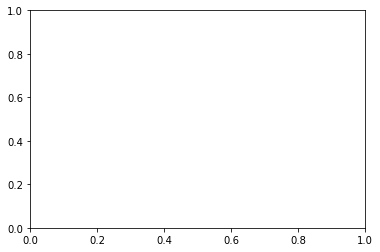

In [49]:
import matplotlib.pyplot as plt

plt.plot(x_len, y_vloss, "o",c="red",makersize = 2)
plt.plot(x_len, y_acc, "o",c="blue",makersize = 3) 

In [48]:
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

# 자동 중단 설정( EarlyStopping() 함수에 모니터할 값과 테스트 오차가 좋아지지 않아도 몇 번까지 기다릴지를 정한다)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

#모델 실행
model.fit(X,Y,validation_split=0.2, epochs=500,
         batch_size=100, callbacks=[early_stopping_callback])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

Train on 5197 samples, validate on 1300 samples
Epoch 1/500
5197/5197 [==============================] - 1s 126us/sample - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.1353 - val_accuracy: 0.9862
Epoch 2/500
5197/5197 [==============================] - 0s 26us/sample - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.1029 - val_accuracy: 0.9885
Epoch 3/500
5197/5197 [==============================] - 0s 26us/sample - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.1112 - val_accuracy: 0.9869
Epoch 4/500
5197/5197 [==============================] - 0s 24us/sample - loss: 0.0047 - accuracy: 0.9981 - val_loss: 0.0961 - val_accuracy: 0.9908
Epoch 5/500
5197/5197 [==============================] - 0s 24us/sample - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.1119 - val_accuracy: 0.9854
Epoch 6/500
5197/5197 [==============================] - 0s 23us/sample - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0995 - val_accuracy: 0.9900
Epoch 7/500
5197/5197 [==============================] - 0s 24u

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


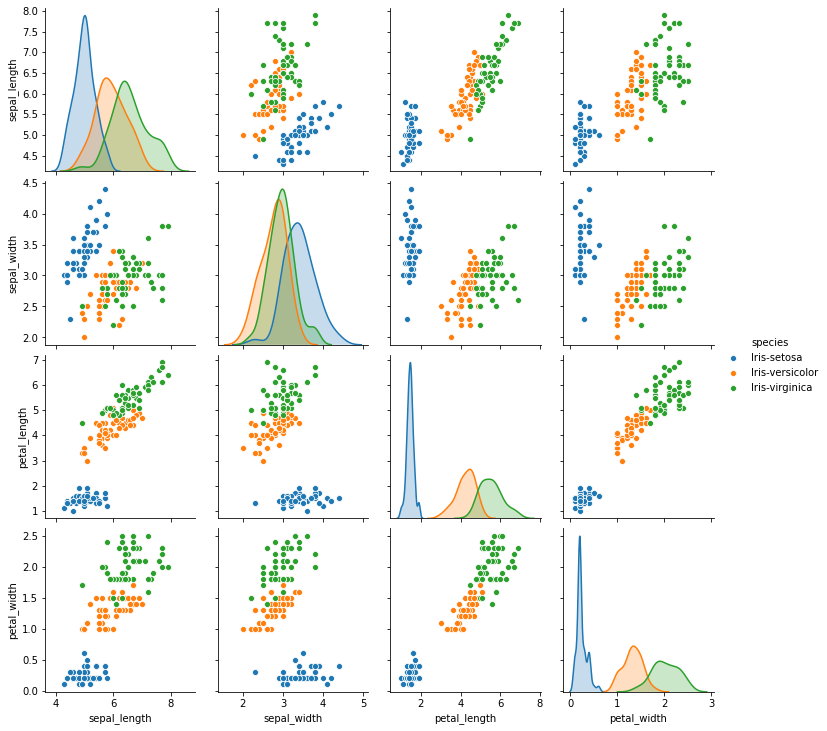

In [18]:
###############신경망을 이용한 다중 분류###########################
#여러 개의 정답 중 하나를 고르는 분류 문제
#상관도 그래프 시각화를 통해 꽃잎과 꽃받침의 크기와 너비가 품종별로 차이가 있는 지 확인
 
import seaborn as sns 

np.random.seed(0)
tf.random.set_seed(0)


df = pd.read_csv('C:/Users/손은주/Multicampus/part2/dataset/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# pairplot 그래프로 확인
sns.pairplot(df, hue='species');
plt.show()

In [19]:
#클래스 Y값 문자열을 수치 데이터로 변환 
#( sklearn의 LabelEncoder -> One-hot-Encoding) 
#tensorflow.keras.utils.to_categorical()

data = df.values
X = data[:, 0:4].astype(float)
Y = data[:, 4]

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
Y_num = le.fit_transform(Y)
Y_encoded = tf.keras.utils.to_categorical(Y_num)

In [20]:
#첫번째 은닉층 (출력뉴런수 16, 활성화함수 re)
#출력증 (출력뉴런수 3, 활성화함수 softmax)
#오차함수 : categorial_crossentroy
#최적화함수 : adam
#측정지표 : accuracy
#epochs : 50
#batch_size : 1

model = Sequential()
model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model.fit(X, Y_encoded, epochs=50, batch_size=1)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 0s 2ms/step - loss: 1.6259 - accuracy: 0.3267
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 1.1405 - accuracy: 0.4867
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.9412 - accuracy: 0.4600
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.7898 - accuracy: 0.7467
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.7267
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.8800
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.8267
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8867
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8867

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null

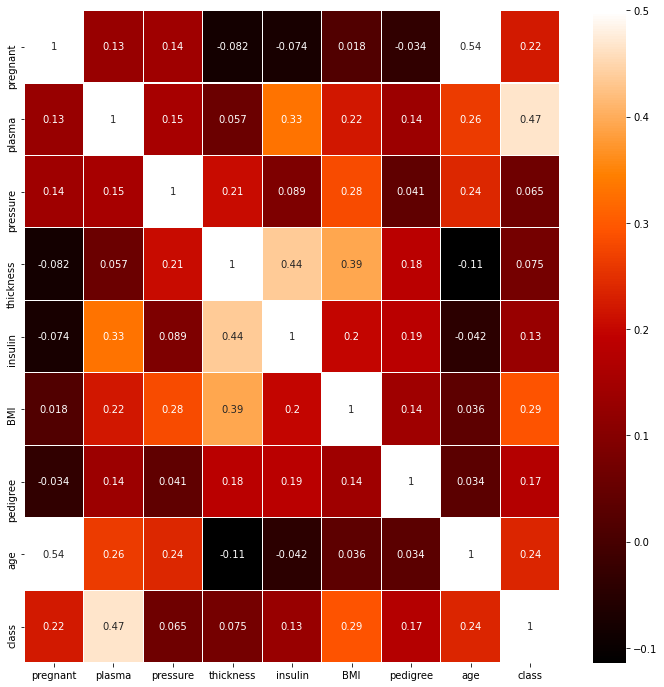

In [21]:
###############신경망을 이용한 이진 분류###########################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋 로드
# 각 컬럼에 해당하는 이름을 지정
df = pd.read_csv('./dataset/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
 
print(df.head())		

# 데이터의 전반적인 정보를 확인 (컬럼 데이터 타입)
print(df.info())	   

#8개의 속성중 heatmap을 이용해서 당뇨병에 상관성이 높은 특성 찾기
colormap = plt.cm.gist_heat   #그래프의 색상 구성 
plt.figure(figsize=(12,12))   #그래프의 크기 정의

# 그래프의 속성-vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시   
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()


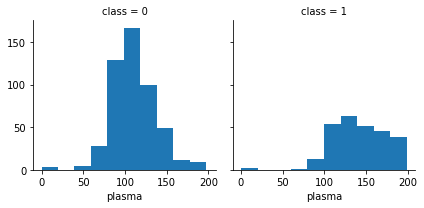

In [22]:
#클래스 0(정상)인 데이터중 plasma값 분포 
#클래스 1(당뇨)인 데이터중 plasma값 분포
grid = sns.FacetGrid(df, col="class")
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

#텐서플로우 라이브러리의 신경망을 사용하여 학습후 정확도 출력
#첫번째 은닉층 출력뉴런수 12 , 활성화 함수 relu
#두번째 은닉층 출력뉴런수 8 , 활성화 함수 relu
#출력층 출력뉴런수 1 , 활성화 함수 sigmoid
#오차계산함수 binary_crossentroy
#최적화함수 adam
#측정 지표 accuracy
#각 데이터 샘플당 200, batch_size=10


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf

numpy.random.seed(0)
tf.random.set_seed(0)

dataset = numpy.loadtxt("./dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=10)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 584us/sample - loss: 7.1497 - accuracy: 0.6224
Epoch 2/200
768/768 [==============================] - 0s 169us/sample - loss: 2.1107 - accuracy: 0.6393
Epoch 3/200
768/768 [==============================] - 0s 171us/sample - loss: 1.3271 - accuracy: 0.6068
Epoch 4/200
768/768 [==============================] - 0s 164us/sample - loss: 1.0484 - accuracy: 0.6172
Epoch 5/200
768/768 [==============================] - 0s 182us/sample - loss: 0.8735 - accuracy: 0.6133
Epoch 6/200
768/768 [==============================] - 0s 216us/sample - loss: 0.7920 - accuracy: 0.6198
Epoch 7/200
768/768 [==============================] - 0s 165us/sample - loss: 0.7347 - accuracy: 0.6224
Epoch 8/200
768/768 [==============================] - 0s 165us/sample - loss: 0.6908 - accuracy: 0.6406
Epoch 9/200
768/768 [==============================] - 0s 171us/sample - loss: 0.6772 - accuracy: 0.6549
Epoch 10/200
768/768 [============

768/768 [==============================] - 0s 184us/sample - loss: 0.5440 - accuracy: 0.7135
Epoch 155/200
768/768 [==============================] - 0s 182us/sample - loss: 0.5463 - accuracy: 0.6914
Epoch 156/200
768/768 [==============================] - 0s 161us/sample - loss: 0.5471 - accuracy: 0.6940
Epoch 157/200
768/768 [==============================] - 0s 212us/sample - loss: 0.5531 - accuracy: 0.6875
Epoch 158/200
768/768 [==============================] - 0s 213us/sample - loss: 0.5413 - accuracy: 0.7018
Epoch 159/200
768/768 [==============================] - 0s 184us/sample - loss: 0.5563 - accuracy: 0.6836
Epoch 160/200
768/768 [==============================] - 0s 162us/sample - loss: 0.5525 - accuracy: 0.6940
Epoch 161/200
768/768 [==============================] - 0s 160us/sample - loss: 0.5465 - accuracy: 0.7018
Epoch 162/200
768/768 [==============================] - 0s 160us/sample - loss: 0.5496 - accuracy: 0.7057
Epoch 163/200
768/768 [============================

In [50]:
##########신경망으로 회귀분석 ######################
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf

numpy.random.seed(0)
tf.random.set_seed(0)


df = pd.read_csv("./dataset/housing.csv", delim_whitespace=True, header=None)


dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam')

model.fit(X_train, Y_train, epochs=200, batch_size=10)



Epoch 1/200
354/354 [==============================] - 0s 364us/step - loss: 2256.6481
Epoch 2/200
354/354 [==============================] - 0s 127us/step - loss: 115.4973
Epoch 3/200
354/354 [==============================] - 0s 141us/step - loss: 77.7723
Epoch 4/200
354/354 [==============================] - 0s 130us/step - loss: 71.7014
Epoch 5/200
354/354 [==============================] - 0s 141us/step - loss: 70.0138
Epoch 6/200
354/354 [==============================] - 0s 132us/step - loss: 67.9230
Epoch 7/200
354/354 [==============================] - 0s 130us/step - loss: 63.9999
Epoch 8/200
354/354 [==============================] - 0s 141us/step - loss: 62.8963
Epoch 9/200
354/354 [==============================] - 0s 124us/step - loss: 61.1088
Epoch 10/200
354/354 [==============================] - 0s 141us/step - loss: 60.2831
Epoch 11/200
354/354 [==============================] - 0s 138us/step - loss: 57.9598
Epoch 12/200
354/354 [==============================] - 0s 1

354/354 [==============================] - 0s 124us/step - loss: 15.5717
Epoch 191/200
354/354 [==============================] - 0s 132us/step - loss: 14.6626
Epoch 192/200
354/354 [==============================] - 0s 132us/step - loss: 13.7611
Epoch 193/200
354/354 [==============================] - 0s 121us/step - loss: 19.8366
Epoch 194/200
354/354 [==============================] - 0s 124us/step - loss: 14.4209
Epoch 195/200
354/354 [==============================] - 0s 121us/step - loss: 13.3344
Epoch 196/200
354/354 [==============================] - 0s 121us/step - loss: 13.5104
Epoch 197/200
354/354 [==============================] - 0s 130us/step - loss: 14.3503
Epoch 198/200
354/354 [==============================] - 0s 135us/step - loss: 14.1032
Epoch 199/200
354/354 [==============================] - 0s 121us/step - loss: 13.3000
Epoch 200/200
354/354 [==============================] - 0s 135us/step - loss: 15.9098


In [52]:
# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 22.600, 예상가격: 20.644
실제가격: 50.000, 예상가격: 26.160
실제가격: 23.000, 예상가격: 21.862
실제가격: 8.300, 예상가격: 12.438
실제가격: 21.200, 예상가격: 18.469
실제가격: 19.900, 예상가격: 21.916
실제가격: 20.600, 예상가격: 19.160
실제가격: 18.700, 예상가격: 24.081
실제가격: 16.100, 예상가격: 18.952
실제가격: 18.600, 예상가격: 13.862


11493376/11490434 [==============================] - 14s 1us/step
학습셋 이미지 수 : 60000 개 
테스트셋 이미지 수: 10000 개 


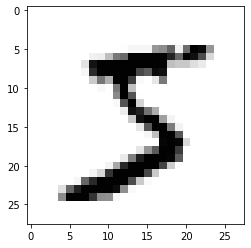

In [8]:
################# 신경망으로 이미지 인식 ################
from keras.datasets import mnist
from keras.utils import np_utils
import sys
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

#MNIST데이터셋 로드
(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개 "% (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개 " %(X_test.shape[0]))

import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap="Greys")
plt.show()

In [16]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

#28*28 의 2차원 배열 => 784개의 1차원 배열 변환 reshape(총샘플수, 1차원 속성의 수)
# X_train.reshpae(X_train[0].shape,784)

X_train = X_train.reshape(X_train.shape[0],784)
X_train = X_train.astype('float64')

X_train = X_train/255 # 정규화

X_test = X_test.reshape(X_test.shape[0],784).astype('float64') / 255

print(X_train[0])  #정규화확인



TypeError: 'numpy.float64' object is not iterable

In [ ]:
#Y 클래스 값 확인
print("class: %d"%(Y_class_train[0]))

# Y클래스 값 one-hot-encoder 변환
Y_train = np_utils.to_categorical(Y_class_train,10)
Y_test = np_utils.to_categorical(Y_class_test,10)

print(Y_train[0])  #one-hot encoder 변환 확인

# 모델 정의
# 첫번째 은닉층 (출력뉴런수 512, 활성화함수 relu)
# 출력층 (출력뉴런수 10, 활성화함수 softmax)
# 오차함수 : categorial_crossentroy
# 최적화 함수
# 다중 분류 평가 측정 지표 accuracy

# 모델 시행 결과 model폴더에 파일로 저장
# 학습 중단

# 학습 정확도와 테스트셋 오차를 시각화

In [15]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers.core import Flatten
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

 
numpy.random.seed(0)
tf.random.set_seed(3)

# 데이터 로드
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 정답 label one-hot enconding
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [16]:
#모델 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# 모델 구축 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행 결과 model 폴더에 파일로 저장
#학습 중단 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback,checkpointer])



TypeError: The added layer must be an instance of class Layer. Found: <class 'keras.layers.core.Flatten'>

In [19]:
#정확도 출력
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test,Y_test)[1]))

#학습셋 오차와 테스트 셋 오차를 시각화
#테스트 셋의 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss,"o",c="red",markersize=3)
plt.plot(x_len, y_loss, "o", c="blue", markersize=3)

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [3]:
##############신경망 하이퍼파라미터 찾기 : GridSearchDV ####
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(0)

number_of_features = 100

features, target = make_classification(n_samples=10000, n_features=number_of_features, n_classes=2, n_informative=3, n_redundant=0, weights=[.5,.5],
                   random_state=0)

def create_network(optimizer='rmsprop') :
    network = Sequential();
    network.add(Dense(units=16, activation='relu', input_shape=(number_of_features,)))
    network.add(Dense(units=16, activation='relu'))
    network.add(Dense(units=1, activation="sigmoid"))
    network.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return network

neural_network = KerasClassifier(build_fn=create_network, verbose=0)

epochs=[5, 10]
batchs =[5, 10, 100]
optimizers =['rmsprop', 'adam']

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batchs)

grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

grid_result = grid.fit(features, target)
print(grid_result.best_params_)


{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}


In [4]:
######## 텍스트 전처리: 문장 토큰화, 단어 토큰화 ###########
from nltk import sent_tokenize
from nltk import word_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room.\ You can see it out your window or on your television.\
                You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text_sample)
print(type(sentences),len(sentences))
print(sentences)

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 2
['The Matrix is everywhere its all around us, here even in this room.\\ You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']
<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\손은주\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#### 텍스트 전처리 2: stopword 제거 ######
nltk.download('stopwords')
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\손은주\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'


stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

def tokenize_text(text):
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence) for sentence in sentences]

    return word_tokens

word_tokens = tokenize_text(text_sample)

for sentence in word_tokens :
    filtered_words=[]
    for word in sentence :
        word = word.lower()
        if word not in stopwords :
            filtered_words.append(word)
    all_tokens.append(filtered_words)

    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [7]:
##### 텍스트 전처리 3: 어근 추출 ######
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))

work work work


In [8]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('working','v'),lemma.lemmatize('works','v'),lemma.lemmatize('worked','v'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\손은주\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


work work work


In [9]:
### 텍스트 전처리 4 : 수치 데이터 벡터화 ####
# 희소 행렬 COO 형식
dense = np.array([[3,0,1],[0,2,0]])

from scipy import sparse
data = np.array([3,1,2])
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

sparse_coo = sparse.coo_matrix((data,(row_pos, col_pos)))
sparse_coo.toarray()


array([[3, 0, 1],
       [0, 2, 0]])

In [10]:
# 희소 행렬 CSR 형식
dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])


data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])
row_pos = np.array([0, 0,1,1,1,1,1, 2, 2, 3, 4, 4, 1])
col_pos = np.array([2, 5, 0, 1,3,4,5, 1, 3, 0, 3, 5, 0])

sparse_csr=sparse.csr_matrix((data2, (row_pos, col_pos)))
sparse_csr.toarray()

array([[0, 0, 1, 0, 0, 5],
       [2, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8]], dtype=int32)

In [11]:
### 뉴스 기사 ####
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)

print(news_data.keys())

print('target 클래스의 값과 분포도\n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름을 \n',news_data.target_names)

#첫번째 기사 내용 확인
print(news_data.data[0])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
target 클래스의 값과 분포도
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름을 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenr

In [12]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


In [13]:
# 카운트 기반으로 벡터화
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape :', X_train_cnt_vect.shape)


학습 데이터 Text의 CountVectorizer Shape : (11314, 101631)


In [14]:
#LogisticRegression를 이용하여 학습데이터에 대한 예측 평가 수행
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorizer LogisticRegression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred)))


CountVectorizer LogisticRegression 예측 정확도 0.607


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
#Tf-Idf Vectorizer 기반 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)

X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)


lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TfidfVectorizer LogisticRegression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred)))

TfidfVectorizer LogisticRegression 예측 정확도 0.674


In [16]:
#pipeline을 사용해서 GridSearchCV 실행
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2),max_df=300)),('lr_clf',LogisticRegression(C=10))])

pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)

print('Pipeline을 통한 LogisticRegression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test,pred)))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline을 통한 LogisticRegression 예측 정확도 0.701


In [25]:
#### 하이퍼 파라미터 찾기 ####

pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2) )),
('lr_clf', LogisticRegression())])

params = {'tfidf_vect__ngram_range' : [(1, 1), (1, 2), (1, 3)], 'tfidf_vect__max_df' : [100, 300, 700], 'lr_clf__C' :[1, 5, 10]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 LogisticRegression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred)))

In [32]:
#######케라스의 텍스트 처리 함수 ########################
#text 모듈의 text_to_word_sequence()

from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = "데이터 분석을 위한 베이지안 모델링"
result = text_to_word_sequence(text)
print(result)


['데이터', '분석을', '위한', '베이지안', '모델링']


In [33]:
# 케라스에서 제공하는 BOW를 수행 함수 Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

docs = ['텍스트의 각 단어를 나누어 토큰화합니다','텍스트의 단어로 토큰화해서 수치 데이터 벡터로 변환해야 딥러닝에서 인식됩니다.',
       '토큰화된 결과는 딥러닝에서 사용할 수 있습니다.']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)
print(tokenizer.word_counts) #단어 빈도수 계산 결과 출력됨
print(tokenizer.document_count) #문장 개수 출력
print(tokenizer.word_docs) #각 단어가 몇개의 문장에 출현하는지 출력
print(tokenizer.word_index) #각 단어에 부여된 인덱스 값 출력

OrderedDict([('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화합니다', 1), ('단어로', 1), ('토큰화해서', 1), ('수치', 1), ('데이터', 1), ('벡터로', 1), ('변환해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화된', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])
3
defaultdict(<class 'int'>, {'단어를': 1, '각': 1, '텍스트의': 2, '나누어': 1, '토큰화합니다': 1, '토큰화해서': 1, '인식됩니다': 1, '변환해야': 1, '벡터로': 1, '단어로': 1, '딥러닝에서': 2, '데이터': 1, '수치': 1, '사용할': 1, '있습니다': 1, '결과는': 1, '수': 1, '토큰화된': 1})
{'텍스트의': 1, '딥러닝에서': 2, '각': 3, '단어를': 4, '나누어': 5, '토큰화합니다': 6, '단어로': 7, '토큰화해서': 8, '수치': 9, '데이터': 10, '벡터로': 11, '변환해야': 12, '인식됩니다': 13, '토큰화된': 14, '결과는': 15, '사용할': 16, '수': 17, '있습니다': 18}


In [34]:
#### 케라스에서 제공하는 텍스트를 원핫인코딩 변환 함수: to_categorical ######

text = ['텍스트의 각 단어를 나누어 토큰화합니다']
token = Tokenizer()
token.fit_on_texts(text)
print(token.word_index)


{'텍스트의': 1, '각': 2, '단어를': 3, '나누어': 4, '토큰화합니다': 5}


In [41]:
x = text_to_sequence(text) # 토큰의 인덱스로 채운 배열 생성 
print(x)


NameError: name 'text_to_sequence' is not defined

In [36]:
from keras.utils import to_categorical

word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size)

print(x)

ValueError: invalid literal for int() with base 10: '텍스트의'

In [37]:
## 텍스트의 원핫인코딩 변환은 그대로 사용하기에는 벡터의 길이가 너무 길어진다.
## 공간적 낭비를 줄이기위해 단어 임베딩 방법을 적용한다.
## 각 단어간의 유사도를 계산하여 배열을 새로운 수치값으로 변환한다.(embedding())

from keras.layers import Embedding

model = Sequential()
#model.add(Embedding(입력단어수, 출력될 벡터 크기, input_length))
#model.add(Embedding(20,5))

In [38]:
# 텍스트 긍정, 부정 예측
import numpy as np
docs = ["너무 재밌어요","최고예요","킬링타임으로 좋아요","참 잘 만든 영화예요", "추천하고 싶은 영화입니다.","글쎄요","별로예요","생각보다 지루합니다.","재미없었어요","그냥그래요"]
classes = np.array([1,1,1,1,1,0,0,0,0,0])

token = Tokenizer()
token.fit_on_texts(text)
print(token.word_index)
x = text_to_sequence(text) # 토큰의 인덱스로 채운 배열 생성 
print(x)

{'텍스트의': 1, '각': 2, '단어를': 3, '나누어': 4, '토큰화합니다': 5}


NameError: name 'text_to_sequence' is not defined

In [39]:
# 서로 다른 길이의 데이터를 패딩으로 맞춰줍니다.
from tensorflow.keras.preprocessing.sequence import pad_sequence

padded_x = pad_sequences(x,4)
print('패딩 결과:',padded_x)

ImportError: cannot import name 'pad_sequence' from 'tensorflow.keras.preprocessing.sequence' (C:\Anaconda\lib\site-packages\tensorflow_core\python\keras\api\_v2\keras\preprocessing\sequence\__init__.py)

In [40]:
from keras.layers import Embedding
word_size = len(token.word_index) +1

model = Sequential()
model.add(Embedding(word_size,8,input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print('Accuracy: %.4f' % (model.evaluate(padded_x,classes)[1]))

NameError: name 'Flatten' is not defined